In [1]:
import pandas as pd  # For handling data in table format (DataFrame)
import numpy as np  # For numerical operations like reshaping arrays
import pickle  # For reading binary files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Loading CIFAR-10 Dataset**

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class.
It is divided into batches of 10,000 images each. 
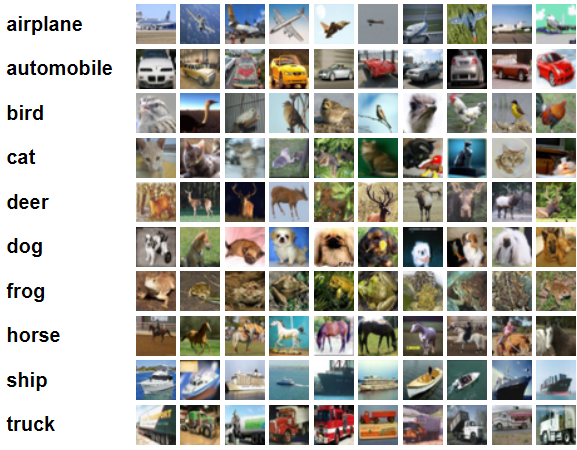

In [2]:
def unpickle(file):
    # Open the file in read-binary mode ('rb') and assign the file object to 'f'
    # The 'with' statement ensures the file is automatically closed when the block is exited
     with open (file,'rb') as f:
         dict = pickle.load(f,encoding='latin1')
     return dict
        

In [3]:
##Load CIFAR-10 Dataset
file = r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\data_batch_1'
data_batch_1 = unpickle(file)


**Understanding data_batch_1**


When the file data_batch_1 is loaded, it is stored as a Python dictionary.

In [4]:
print(type(data_batch_1))  
print(data_batch_1.keys()) 

<class 'dict'>
dict_keys(['batch_label', 'labels', 'data', 'filenames'])


=>There are four keys: batch_lebel, labels, data and filenames. Let’s look these four levels’ class types.

In [5]:
#Checking Data Types
for item in data_batch_1:
    print(item, type(data_batch_1[item]))

batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>


**Extracting Data and Labels**

In [6]:
print("Labels:",set(data_batch_1['labels']))

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


->We have 10 labels 0-9.

In [7]:
X_train = data_batch_1['data']
print(X_train.shape)



(10000, 3072)


In [8]:
print(X_train.shape)

# The shape (10000, 3072) indicates:
# 10,000 images.
# Each image is represented as a 1D array with 3,072 entries.


(10000, 3072)


The whole data_batch_1 has 10,000 images. And each image is a 1-D array having 3,072 entries. First 1024 entries for Red, the next 1024 entries for Green and last 1024 entries for Blue channels. 

To visualise the images we have to change the shape of image as (32,32,3).

##### What is Metadata?
Metadata is extra information about data. In the case of CIFAR-10, it’s the names of the image labels. For example, instead of just numbers (0, 1, 2), you want to know that:

0 means "airplane"
1 means "car"
2 means "bird" And so on.

##### .How Do We Use Metadata?
A. Loading the Metadata:
We load a file called batches.meta to get the label names.

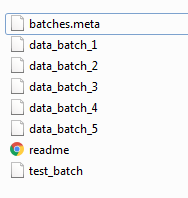

In [9]:
meta_file = r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\batches.meta'
meta_data = unpickle(meta_file)

In [10]:
print(type(meta_data))
print(meta_data.keys())
# num_cases_per_batch tells how many images are in each batch.
# label_names gives the categories or labels of the images.
# num_vis gives the number of features (pixels) for each image.

<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])


The meta file is a dictionary and has three keys. We are more interested here for ‘label_names’.

In [11]:
print("Label Names:",meta_data['label_names'])

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### The ten label names are given above.

**Reshape And Transpose a Single Image**

Our image is a single dimension array of size 3072. 
First 1024 entries of the array are of Red channel,
next 1024 entries are of Green channel,
and last 1024 entries are of Blue channel.
Total 3072 entries are of three RGB channels. 

##### First we reshape the image/ array into (3,32,32) using image.reshape(3,32,32). (32,32) for 32x32 =1024 entries and 3 for RGB channels.

In [12]:
image = data_batch_1['data'][0]  # First image data
image = image.reshape(3, 32, 32)  # Reshape to 3 color channels, 32x32 pixels
print(image.shape)

(3, 32, 32)


#####  Next we transpose the reshaped image to get the image of shape (32,32,3). We use image.transpose(1,2,0).

In [13]:
image = image.transpose(1, 2, 0)  # Rearrange it so we can display it
print(image.shape)

(32, 32, 3)


In [14]:
# Reshape And Transpose CIFAR-10 Dataset
X_train = data_batch_1['data']  # Load the image data
print("Shape before reshape:", X_train.shape)  # Corrected variable name

# Reshape the whole image data
X_train = X_train.reshape(len(X_train), 3, 32, 32)
print("Shape after reshape and before transpose:", X_train.shape)

# Transpose the whole data
X_train = X_train.transpose(0, 2, 3, 1)
print("Shape after reshape and transpose:", X_train.shape)



Shape before reshape: (10000, 3072)
Shape after reshape and before transpose: (10000, 3, 32, 32)
Shape after reshape and transpose: (10000, 32, 32, 3)


#### Visualization ####
##### Visualizing Single Image From CIFAR-10 Dataset #####
We first visualize a single image using Matplotlib. We use plt.imshow() to display the image. Let’s visualize first image.

Text(0.5, 1.0, 'frog')

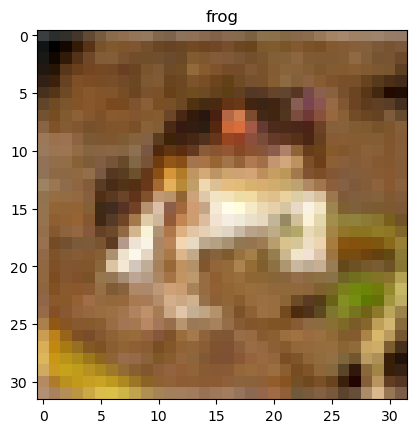

In [15]:
import matplotlib.pyplot as plt
# label names
label_name = meta_data['label_names']
# take first image
image = data_batch_1['data'][0]
# take first image label index
label = data_batch_1['labels'][0]
# Reshape the image
image = image.reshape(3,32,32)
# Transpose the image
image = image.transpose(1,2,0)
# Display the image
plt.imshow(image)
plt.title(label_name[label])

#### Visualizing Multiple Images From CIFAR-10 Dataset ####
We visualize some randomly selected images from the training data batch

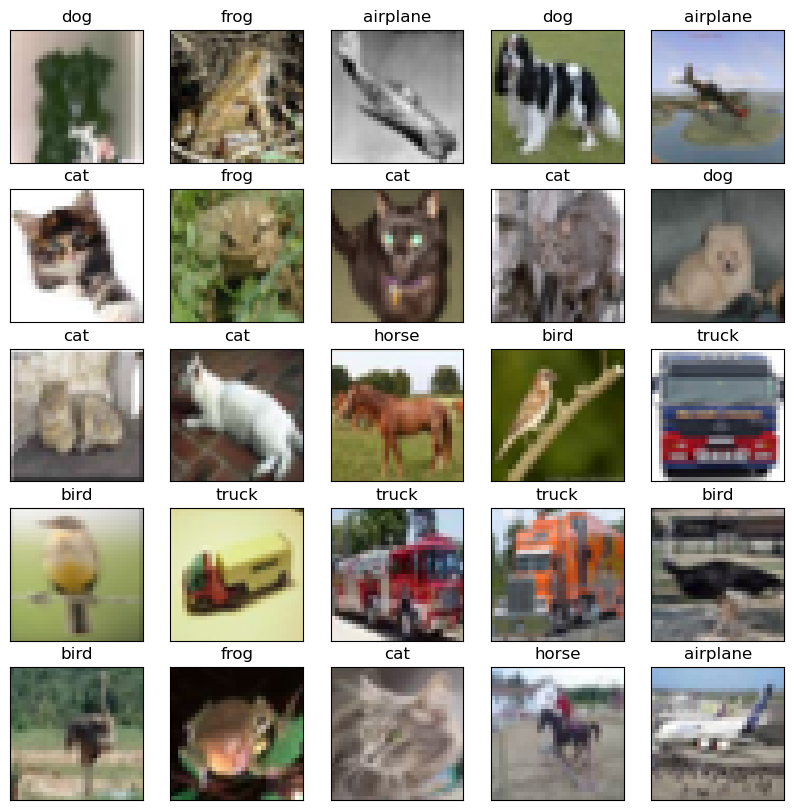

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# take the images data from batch data
images = data_batch_1['data']
# reshape and transpose the images
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
# take labels of the images 
labels = data_batch_1['labels']
# label names of the images
label_names = meta_data['label_names']

# dispaly random images
# define row and column of figure
rows, columns = 5, 5 #This means we will display 5 × 5 = 25 images.
imageId = np.random.randint(0, len(images), rows * columns)
# take random image idex id
imageId = np.random.randint(0, len(images), rows * columns)
# take images for above random image ids
images = images[imageId]
# take labels for these images only
labels = [labels[i] for i in imageId]

# define figure
fig=plt.figure(figsize=(10, 10))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(label_names[labels[i-1]]))
plt.show()

In [17]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
# Extract data and labels
X_data = data_batch_1['data']
y_data = data_batch_1['labels']
label_names = meta_data['label_names']

# Convert to NumPy arrays
X_data = np.array(X_data)
y_data = np.array(y_data)

# Reshape and transpose data to match image format (32, 32, 3)
X_data = X_data.reshape(len(X_data), 3, 32, 32).transpose(0, 2, 3, 1)

# Normalize the data to the range [0, 1]
X_data = X_data / 255.0


# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (6000, 32, 32, 3) (6000,)
Validation set shape: (2000, 32, 32, 3) (2000,)
Test set shape: (2000, 32, 32, 3) (2000,)


Training set shape: (40000, 32, 32, 3) (40000,)
Validation set shape: (10000, 32, 32, 3) (10000,)
Test set shape: (10000, 32, 32, 3) (10000,)


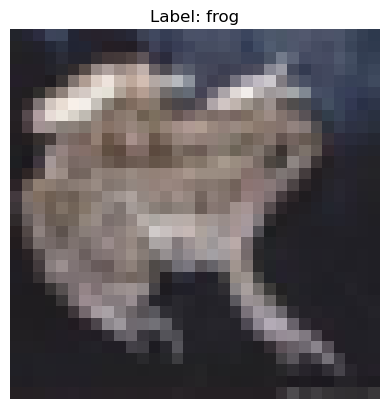

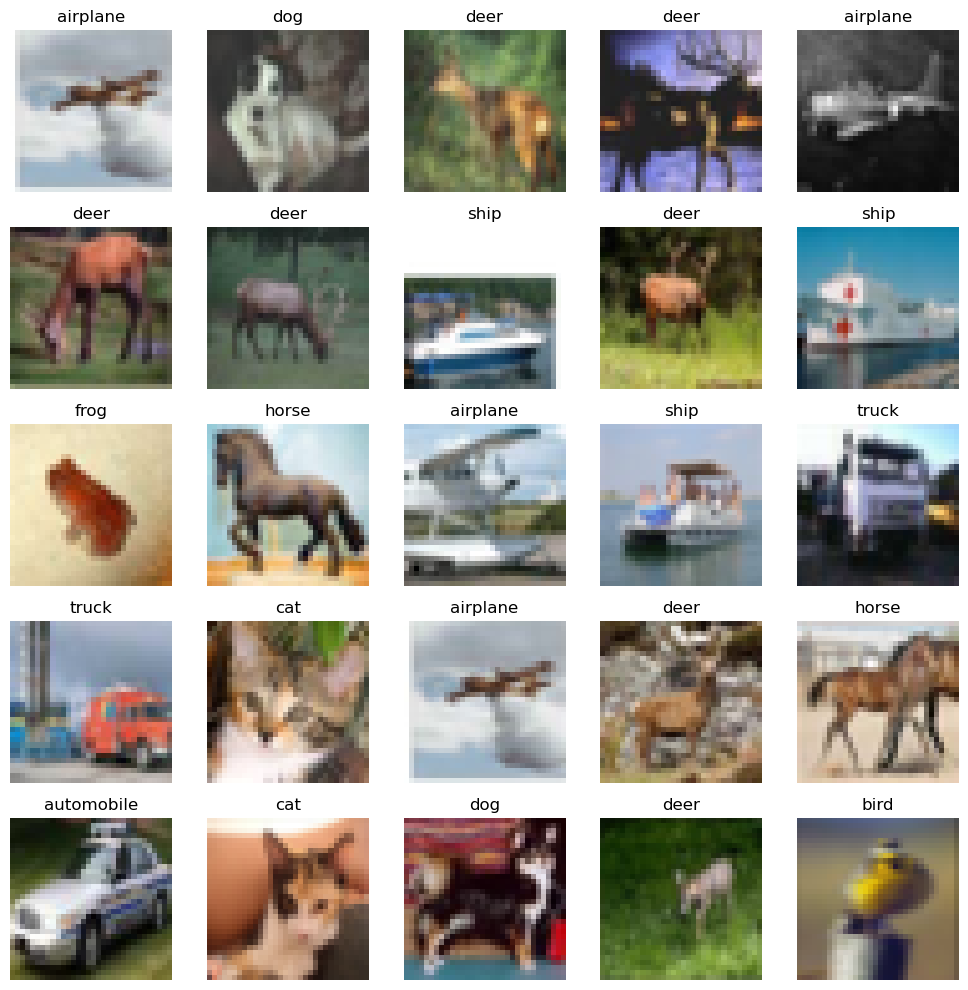

In [18]:
import os
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to unpickle CIFAR-10 files
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data

# Path to CIFAR-10 dataset files
cifar10_path = r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py'
batch_files = [os.path.join(cifar10_path, f"data_batch_{i}") for i in range(1, 6)]
test_file = os.path.join(cifar10_path, "test_batch")
meta_file = os.path.join(cifar10_path, "batches.meta")

# Load meta file for label names
meta_data = unpickle(meta_file)
label_names = meta_data['label_names']

# Load training data
x_train, y_train = [], []
for batch_file in batch_files:
    batch = unpickle(batch_file)
    x_train.append(batch['data'])
    y_train.extend(batch['labels'])

x_train = np.concatenate(x_train)
y_train = np.array(y_train)

# Load test data
test_batch = unpickle(test_file)
x_test = test_batch['data']
y_test = np.array(test_batch['labels'])

# Reshape and transpose the images
x_train = x_train.reshape(len(x_train), 3, 32, 32).transpose(0, 2, 3, 1)
x_test = x_test.reshape(len(x_test), 3, 32, 32).transpose(0, 2, 3, 1)

# Normalize images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# Function to visualize a single image
def visualize_single_image(X, y, label_names, index=0):
    image = X[index]
    label = y[index]
    plt.imshow(image)
    plt.title(f"Label: {label_names[label]}")
    plt.axis("off")
    plt.show()

# Visualize a single image from the training set
visualize_single_image(x_train, y_train, label_names, index=0)

# Function to visualize multiple images
def visualize_multiple_images(X, y, label_names, rows=5, columns=5):
    fig, axes = plt.subplots(rows, columns, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(0, len(X))
        ax.imshow(X[idx])
        ax.set_title(label_names[y[idx]])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Visualize multiple random images from the training set
visualize_multiple_images(x_train, y_train, label_names)


Load all data to split

In [19]:
# Load training data from different batches
data_batch_files = [
    r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\data_batch_1',
    r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\data_batch_2',
    r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\data_batch_3',
    r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\data_batch_4',
    r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\data_batch_5'
]

X_train_all = []
y_train_all = []

# Merge training data from all batches
for file in data_batch_files:
    data_batch = unpickle(file)
    X_train_all.append(data_batch['data'])
    y_train_all.extend(data_batch['labels'])

# Convert to numpy array
X_train_all = np.vstack(X_train_all)  
y_train_all = np.array(y_train_all)

# Load test data
test_file = r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\test_batch'
test_batch = unpickle(test_file)
X_test = test_batch['data']
y_test = test_batch['labels']

# Load meta data (label names)
meta_file = r'C:\Users\RTX\My first machine_learning project\cifar-10-python\cifar-10-batches-py\batches.meta'
meta_data = unpickle(meta_file)
label_names = meta_data['label_names']


Splitting the Data into Train and Validation Sets


In [20]:

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (40000, 3072)
Validation data shape: (10000, 3072)
Test data shape: (10000, 3072)


#### Data Preprocessing ####

- Normalization: Ensures that pixel values are scaled to the range [0, 1], improving model convergence and performance.
- Reshaping and Transposing: Reshapes each image to its correct dimensions, ensuring that the model receives data in the expected format **(batch_size, height, width, channels).**

In [21]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Reshape the data into the required format (32x32x3)
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)
X_val = X_val.reshape(X_val.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)

# Print the shapes of the data
print(f"Training data shape after preprocessing: {X_train.shape}")
print(f"Validation data shape after preprocessing: {X_val.shape}")
print(f"Test data shape after preprocessing: {X_test.shape}")


Training data shape after preprocessing: (40000, 32, 32, 3)
Validation data shape after preprocessing: (10000, 32, 32, 3)
Test data shape after preprocessing: (10000, 32, 32, 3)


In [22]:
# Flatten the images (32x32x3 -> 3072-dimensional vector)
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (40000, 3072)
Validation data shape: (10000, 3072)
Test data shape: (10000, 3072)


### 💡Build SVM from scratch


#### 1.Label Preprocessing

To convert multi-class labels into binary values, we define the transformation as:

- y_i=+1 , for target class
- y_i=-1 ,o.w

In [23]:
def preprocess_labels(y, target_class=0):
    y = np.array(y).flatten()  # Convert to NumPy array and flatten
    return ((y == target_class).astype(int) * 2) - 1


#### 2.Quadratic Programming (Dual SVM Optimization)

- The SVM dual objective function:

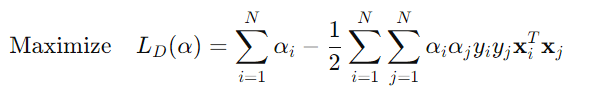


Where:

- 𝛼𝑖:are the Lagrange multipliers,
- 𝑦𝑖:are the class labels,
- 𝑥𝑖:are the feature vectors.


- Constraints:
   - 0≤αi≤C (Box constraints),
   - ∑αiyi=0 (Equality constraint).

   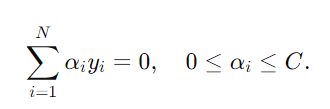

#### **cvxopt Overview:**
cvxopt is a Python library for solving convex optimization problems. It supports optimization techniques like quadratic programming (QP), linear programming (LP), and other convex problems. This makes it ideal for solving Support Vector Machine (SVM) optimization problems, which are formulated as QP problems.
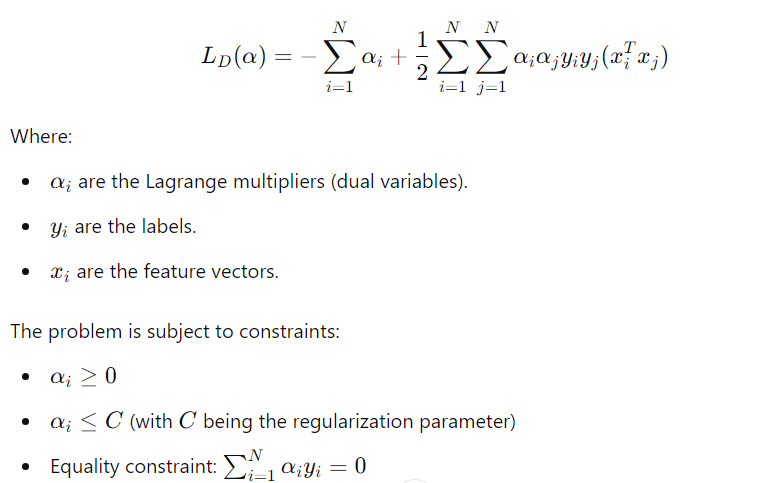
rices \( G \), \( h \), \( A \), and \( b \).


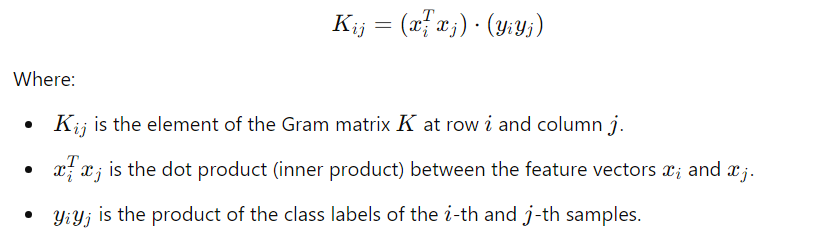
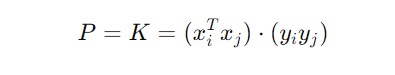
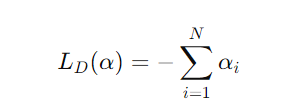
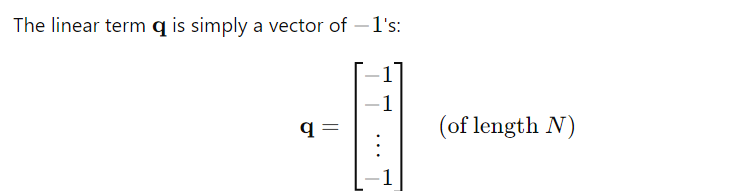
- Why Negative Ones?

The negative sign is required because in the objective function, the goal is to maximize the Lagrange multipliers 𝛼𝑖, but CVXOPT minimizes the objective by default. So, minimizing −𝛼𝑖 corresponds to maximizing 𝛼𝑖, which is the objective of the SVM optimization.


***The matrix G and the vector h define the box constraints for the Lagrange multipliers 𝛼𝑖 in the SVM dual problem.***

Gα≤h
- Matrix G enforces the inequality constraints 𝛼𝑖≥0 and 𝛼𝑖≤𝐶
  - The negative identity matrix enforces 𝛼𝑖≥0.
  - The positive identity matrix enforces 𝛼𝑖≤𝐶.
- Vector h specifies the upper and lower bounds for the inequality constraints
  - The first part of h (all zeros) corresponds to 𝛼𝑖≥0,
  - The second part of h (all 𝐶's) corresponds to 𝛼𝑖≤𝐶.
 




- Matrix A: Represents the equality constraint
The matrix A is created to represent the equality constraint ∑𝛼𝑖𝑦𝑖=0 in the form: **Aα=b**
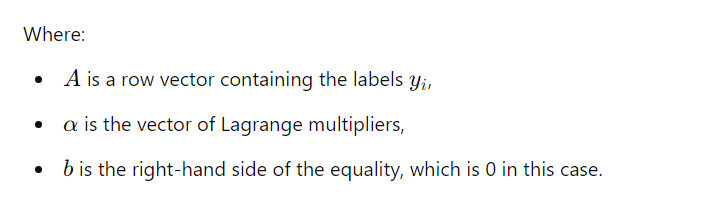


In [24]:
import cvxopt 
import numpy as np

# Solve Quadratic Programming for SVM dual problem
def solve_qp(X, y, C=None):
    N = X.shape[0]  # Number of samples
    K = np.dot(X, X.T) * np.outer(y, y)  # Compute the Gram matrix

    # Define QP matrices for the dual problem
    P = cvxopt.matrix(K)  # Kernel matrix (Gram matrix)
    q = cvxopt.matrix(-np.ones(N))  # Linear term (constant vector -1)

    # G is the matrix for the box constraints 0 <= alpha_i <= C
    G = cvxopt.matrix(np.vstack([-np.eye(N), np.eye(N)]))  # Negative and positive identity matrices
    h = cvxopt.matrix(np.hstack([np.zeros(N), np.ones(N) * C if C else np.inf]))  # 0 <= alpha_i <= C

    # A is the matrix for the equality constraint: sum(alpha_i * y_i) = 0
    A = cvxopt.matrix(y, (1, N), 'd')  # Labels as a row vector
    b = cvxopt.matrix(0.0)  # The equality constraint right-hand side (0)

    # Solve the quadratic programming problem using CVXOPT
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    #np.ravel() flattens the result to a 1D array.
    alphas = np.ravel(solution['x'])  # Extract the optimal alphas
    return alphas

- If 𝛼𝑖>0, the corresponding training point is a support vector.
- If 𝛼𝑖=0, the point is not a support vector and does not influence the decision boundary.

### Weight Vector 𝑤
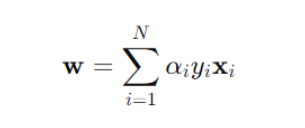

In [25]:
def compute_w(X, y, alphas):
    return np.sum(alphas[:, None] * y[:, None] * X, axis=0)


### Bias Term 𝑏
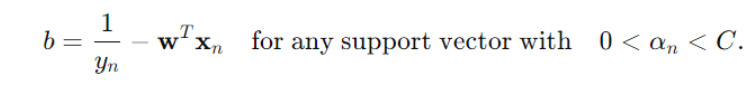

In [26]:
def compute_b(X, y, alphas, w, tol=1e-5, C=1.0):
    # Find support vectors: 0 < alpha < C
    support_vector_indices = np.where((alphas > tol) & (alphas < C))[0]
    if len(support_vector_indices) == 0:
        raise ValueError("No support vectors found. Check your inputs and C value.")
    
    # Use the first support vector to calculate b
    n = support_vector_indices[0]
    b = (1 / y[n]) - np.dot(w, X[n])
    return b


### Classifier Function
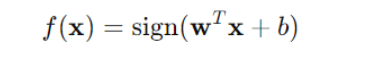

In [27]:
def classify(X, w, b):
    return np.sign(np.dot(X, w) + b)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


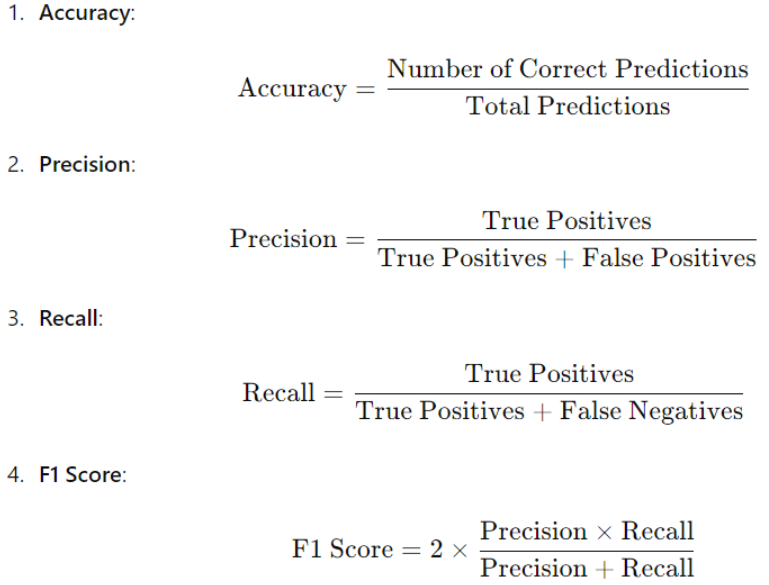

In [29]:
def svm_train_and_evaluate(X_train, y_train, X_val, y_val, C=1.0):
    # Solve for alpha
    alphas = solve_qp(X_train, y_train, C)

    # Compute W and b
    w = compute_w(X_train, y_train, alphas)
    b = compute_b(X_train, y_train, alphas, w, C=C)

    print("Optimal alphas:", alphas)
    print("Weight vector W:", w)
    print("Bias term b:", b)

    # Validation predictions
    y_val_pred = classify(X_val, w, b)

    # Evaluate performance
    accuracy, precision, recall, f1 = evaluate(y_val, y_val_pred)
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
    
    
    return w, b, accuracy


In [30]:
target_class = 0  # Airplane class
y_train_binary = preprocess_labels(y_train, target_class)
y_test_binary = preprocess_labels(y_test, target_class)


In [31]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Randomly select a smaller subset for training
subset_size = 1000  # Experiment with this size
random_indices = np.random.choice(X_train_scaled.shape[0], subset_size, replace=False)
X_train_subset = X_train_scaled[random_indices]
y_train_subset = y_train_binary[random_indices]

# Randomly select a smaller subset for testing (optional)
test_subset_size = 500  # Experiment with this size
test_random_indices = np.random.choice(X_test_scaled.shape[0], test_subset_size, replace=False)
X_test_subset = X_test_scaled[test_random_indices]
y_test_subset = y_test_binary[test_random_indices]

# Apply PCA to reduce the dimensionality (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_subset)
X_test_pca = pca.transform(X_test_subset)

# Proceed with training and evaluation
w, b, accuracy = svm_train_and_evaluate(X_train_pca, y_train_subset, X_test_pca, y_test_subset, C=1.0)


     pcost       dcost       gap    pres   dres
 0: -2.4484e+02 -2.7075e+03  2e+04  3e+00  9e-12
 1: -1.6006e+02 -1.7355e+03  3e+03  4e-01  7e-12
 2: -1.3479e+02 -8.7679e+02  1e+03  2e-01  4e-12
 3: -1.2085e+02 -4.0178e+02  4e+02  5e-02  4e-12
 4: -1.1566e+02 -2.6606e+02  2e+02  3e-02  3e-12
 5: -1.1192e+02 -1.7826e+02  1e+02  1e-02  3e-12
 6: -1.1078e+02 -1.3740e+02  4e+01  3e-03  4e-12
 7: -1.1083e+02 -1.2132e+02  1e+01  9e-04  4e-12
 8: -1.1155e+02 -1.1601e+02  5e+00  3e-04  4e-12
 9: -1.1182e+02 -1.1378e+02  2e+00  6e-05  4e-12
10: -1.1222e+02 -1.1283e+02  6e-01  1e-05  4e-12
11: -1.1235e+02 -1.1257e+02  2e-01  3e-06  4e-12
12: -1.1242e+02 -1.1245e+02  4e-02  5e-08  4e-12
13: -1.1243e+02 -1.1244e+02  1e-02  1e-08  4e-12
14: -1.1243e+02 -1.1243e+02  4e-04  3e-10  4e-12
15: -1.1243e+02 -1.1243e+02  7e-05  4e-11  4e-12
Optimal solution found.
Optimal alphas: [1.01119509e-08 1.38335587e-08 6.17877308e-09 6.95243764e-09
 6.60585704e-09 1.07860749e-08 3.49547385e-09 4.62759400e-09
 3.669

In [32]:
# C_values to tune
C_values = [0.01, 0.1, 1, 10]
best_accuracy = 0
best_C = None

# Loop over different C values
for C in C_values:
    print(f"Training with C={C}...")
    
    # Train and evaluate the SVM
    w, b, accuracy = svm_train_and_evaluate(X_train_pca, y_train_subset, X_test_pca, y_test_subset, C=C)
    
    # Evaluate the model on the test set
    y_test_pred = classify(X_test_pca, w, b)
    accuracy, precision, recall, f1 = evaluate(y_test_subset, y_test_pred)
    
    print(f"Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
    
    # Track the best C value
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"Best C value: {best_C} with accuracy {best_accuracy}")


Training with C=0.01...
     pcost       dcost       gap    pres   dres
 0: -1.2365e+02 -2.3582e+01  1e+04  1e+02  5e-12
 1: -3.3155e+00 -2.3412e+01  2e+02  1e+00  5e-12
 2: -1.7971e+00 -1.5972e+01  3e+01  2e-01  6e-13
 3: -1.4083e+00 -6.5209e+00  7e+00  3e-02  1e-13
 4: -1.3370e+00 -2.5759e+00  2e+00  7e-03  5e-14
 5: -1.4048e+00 -1.8170e+00  5e-01  1e-03  5e-14
 6: -1.4544e+00 -1.6067e+00  2e-01  4e-04  5e-14
 7: -1.4761e+00 -1.5416e+00  7e-02  1e-04  5e-14
 8: -1.4871e+00 -1.5097e+00  2e-02  2e-06  6e-14
 9: -1.4947e+00 -1.4983e+00  4e-03  3e-07  6e-14
10: -1.4960e+00 -1.4963e+00  3e-04  3e-08  6e-14
11: -1.4961e+00 -1.4962e+00  7e-06  5e-10  6e-14
12: -1.4962e+00 -1.4962e+00  2e-07  1e-11  6e-14
Optimal solution found.
Optimal alphas: [7.14816831e-11 1.10724709e-10 5.03197248e-11 8.25335156e-11
 4.58108800e-11 8.45201406e-11 2.22684454e-11 4.01974081e-11
 3.13708312e-11 2.85666726e-11 5.66709121e-11 4.14957923e-03
 5.01932271e-11 3.92716665e-04 1.97698843e-11 5.33539249e-11
 4.6286

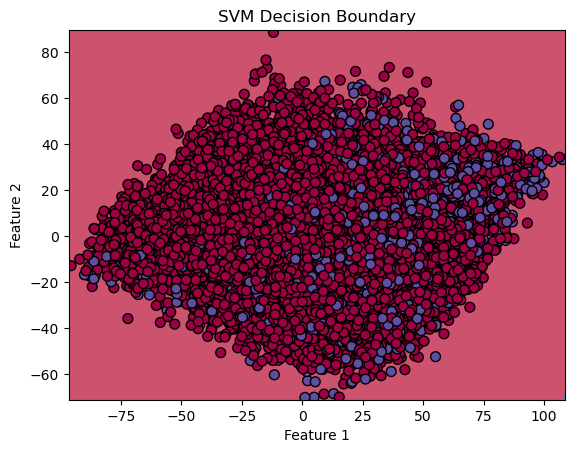

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to classify points based on the learned model
def classify(X, w, b):
    return np.sign(np.dot(X, w) + b)

# Visualize the decision boundary for the custom SVM model
def plot_decision_boundary(X, y, w, b, title="SVM Decision Boundary"):
    # Create a meshgrid for plotting decision boundary
    h = .02  # Step size in the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Flatten the grid to predict class labels for the meshgrid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Ensure that w is a 2D vector for the 2D data
    if len(w) != 2:
        w = w[:2]  # Make sure we're only using the first two dimensions

    Z = classify(grid_points, w, b)  # Use the classify function to get predictions
    Z = Z.reshape(xx.shape)  # Reshape the predictions back into the grid shape

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)  # Contour plot for decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Assuming you have reduced the data to 2D using PCA (if needed)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)  # Reduce train data to 2D
X_test_pca = pca.transform(X_test_scaled)  # Reduce test data to 2D

# Assuming `w` and `b` are already obtained from your trained SVM model
# Train your SVM model here if not done yet.

# Plot the decision boundary on the training data
plot_decision_boundary(X_train_pca, y_train_binary, w, b, "SVM Decision Boundary")
